# Kaggle: Solar Power Generation Data
## Plant 1 Generation Data
### Part 1: Solar Energy Output and Analysis


[i]: https://en.wikipedia.org/wiki/Photovoltaic_effect

[ii]: https://en.wikipedia.org/wiki/Solar_inverter
The analytics and visualizations created are based of Solar power generation and sensor data produced from two power plants. 

Solar Power involves the conversion of light energy emitted by the sun to electrical energy. Photovoltaic cells are a method of harnessing the power of sunlight and converting them into a more usable and applicable form via the [Photovoltaic effect][i]. 

These Photovoltaic cells are ordered in an array which produces DC power that changes depending on the sunlight's intentsity and angle of incidence. Such power output can be converted into AC power which is readily used in modern day appliances as well as power grids, lighting and heating. This is achieved by the [inverter][ii] which is tied to a module which connects an array of solar cells. This is then integrated into existing power grids/meters. The power output of the AC is highly dependant on the DC output as well as the frequency/phase. 

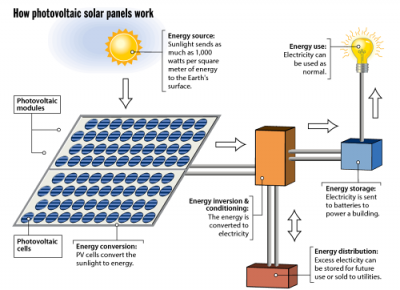

In [6]:
from IPython.display import Image
Image(r'C:\Users\Atrey\Pictures\how-photovoltaic-solar-panels-work-400x290.png')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

### Look at basic shape and layout of dataset "Plant 1 Generation"

In [13]:
data = pd.read_csv("C:/Users/Atrey/Documents/Plant_1_Generation_Data.csv")
dataProcessed = pd.DataFrame(data)
print(dataProcessed.shape) #display shape 
dataProcessed

(68778, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Check for null values in dataset for Plant 1 Generation

In [14]:
print('Null values present in each column:\n')
print(dataProcessed.isnull().sum()) #Find if there are any null values

Null values present in each column:

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


### Check for statistical information

In [15]:
dataProcessed.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


## Visualize and analyse graphs

In [16]:
#Take initial dataset imported and begin to parse dates 
dataProcessed['DATE_TIME'] = pd.to_datetime(dataProcessed['DATE_TIME'])
dataProcessed['DATE'] = dataProcessed['DATE_TIME'].dt.date
dataProcessed['TIME'] = dataProcessed['DATE_TIME'].dt.time

#Create new dataframe and add time, date, yield, DC and AC
dataTable = pd.DataFrame()
dataTable['TIME'] = dataProcessed['TIME']
dataTable['DATE'] = dataProcessed['DATE']
dataTable['YIELD'] = dataProcessed['DAILY_YIELD']
dataTable['DC'] = dataProcessed['DC_POWER']
dataTable['AC'] = dataProcessed['AC_POWER']

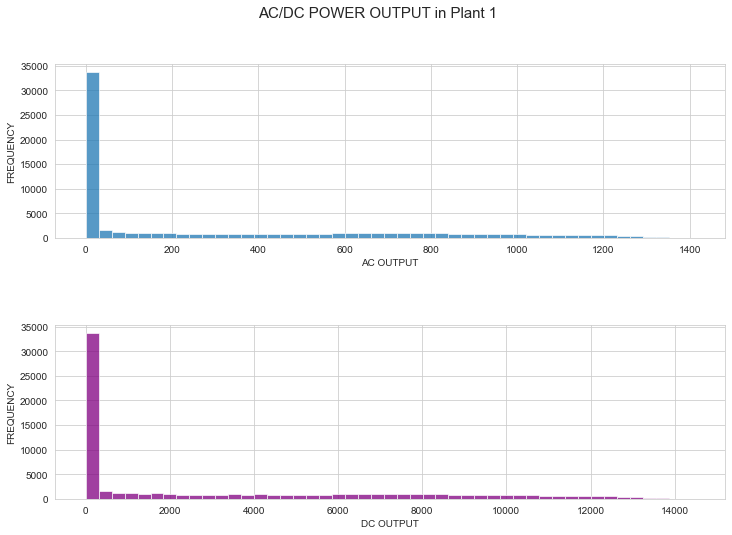

In [17]:
#Visualize and compare outputs of AC vs DC
sns.set_style('whitegrid')


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
x_axis1 = "AC OUTPUT"
y_axis1 = "FREQUENCY"
x_axis2 = "DC OUTPUT"
y_axis2 = "FREQUENCY"
#The custom labels are set to the x and y axes

fig.suptitle("AC/DC POWER OUTPUT in Plant 1 \n", fontsize = 15)
graph1 = sns.histplot(dataTable['AC'], ax = ax1)
#graph1.set_title('AC POWER OUTPUT')
graph2 = sns.histplot(dataTable['DC'], color = 'purple', ax = ax2)
#graph2.set_title('DC POWER OUTPUT')
graph1.set(xlabel = x_axis1, ylabel=y_axis1)
graph2.set(xlabel = x_axis2, ylabel=y_axis2)

plt.subplots_adjust(hspace=0.5)
fig.set_size_inches(12, 8)

<AxesSubplot:xlabel='DATE_TIME'>

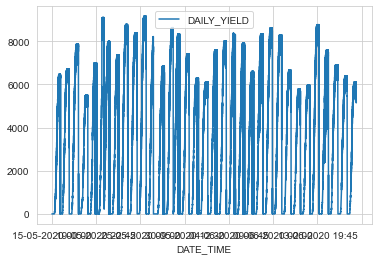

In [18]:
#Create a new dataframe for visualization
#Graph initial dataset and join DAILY_YIELD and DATE_TIME to one new table for analysis
dataGen1 = pd.read_csv("C:/Users/Atrey/Documents/Plant_1_Generation_Data.csv")
dataGen1YieldDATE = pd.concat([dataGen1['DAILY_YIELD'], dataGen1['DATE_TIME']], axis = 1)
dataGen1YieldDATE = pd.DataFrame(dataGen1YieldDATE)
dataGen1YieldDATE.plot(x='DATE_TIME', y = 'DAILY_YIELD')

               DATE_TIME  PLANT_ID  DC_POWER  AC_POWER    DAILY_YIELD  \
0    2020-05-15 00:00:00  86835021       0.0       0.0       0.000000   
1    2020-05-15 00:15:00  86835021       0.0       0.0       0.000000   
2    2020-05-15 00:30:00  86835021       0.0       0.0       0.000000   
3    2020-05-15 00:45:00  86835021       0.0       0.0       0.000000   
4    2020-05-15 01:00:00  90970022       0.0       0.0       0.000000   
...                  ...       ...       ...       ...            ...   
3153 2020-06-17 22:45:00  90970022       0.0       0.0  129571.000000   
3154 2020-06-17 23:00:00  90970022       0.0       0.0  129571.000000   
3155 2020-06-17 23:15:00  90970022       0.0       0.0  129571.000000   
3156 2020-06-17 23:30:00  90970022       0.0       0.0  129571.000000   
3157 2020-06-17 23:45:00  90970022       0.0       0.0  127962.767857   

      TOTAL_YIELD      time  
0     143581676.0  00:00:00  
1     143581676.0  00:15:00  
2     143581676.0  00:30:00  
3  

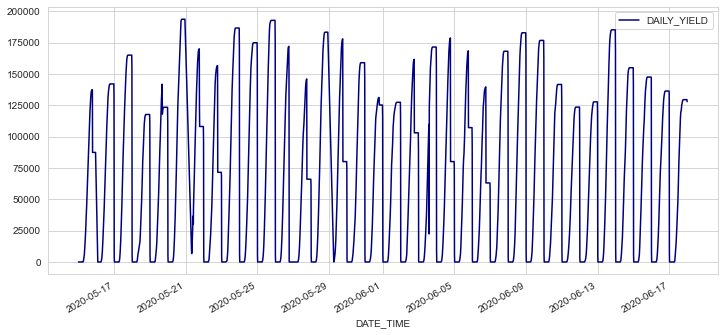

In [19]:
#Parse dates to create better visualization of previous graph
fig = plt.figure()
ax1 = fig.add_subplot(211)

dataGen1['DATE_TIME'] = pd.to_datetime(dataGen1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
dataGen1Simplified = dataGen1.groupby('DATE_TIME').sum().reset_index()
dataGen1Simplified['time']=dataGen1Simplified['DATE_TIME'].dt.time

print(dataGen1Simplified)

dataGen1Simplified.plot(x='DATE_TIME', y='DAILY_YIELD', color='navy', ax = ax1)
fig.set_size_inches(12,12)

print(dataGen1['TOTAL_YIELD'].max())

In [20]:
#Search for maximum output of AC and DC power in Plant 1 Generation
df = pd.DataFrame(dataGen1.loc[dataGen1['DAILY_YIELD'] == 9163 ])
print('Maximum Daily Yield In particular day is: \n')
df

Maximum Daily Yield In particular day is: 



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
20848,2020-05-25 18:45:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20870,2020-05-25 19:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20892,2020-05-25 19:15:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20914,2020-05-25 19:30:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20936,2020-05-25 19:45:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20958,2020-05-25 20:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
20980,2020-05-25 20:15:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
21002,2020-05-25 20:30:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
21024,2020-05-25 20:45:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0
21046,2020-05-25 21:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0


In [43]:
dataGen1TotalYieldMaximum = pd.DataFrame(dataGen1.loc[dataGen1['TOTAL_YIELD'] == 7.846821e+06])
print('Maximum total Yield In particular day is: \n')
dataGen1TotalYieldMaximum

Maximum total Yield In particular day is: 



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68297,2020-06-17 18:30:00,4135001,7JYdWkrLSPkdwr4,77.714286,7.514286,5856.0,7846821.0
68319,2020-06-17 18:45:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68341,2020-06-17 19:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68363,2020-06-17 19:15:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68385,2020-06-17 19:30:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68407,2020-06-17 19:45:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68429,2020-06-17 20:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68451,2020-06-17 20:15:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68473,2020-06-17 20:30:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0
68495,2020-06-17 20:45:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5856.0,7846821.0


In [44]:
dataGen1TotalYieldMinimum = pd.DataFrame(dataGen1.loc[dataGen1['TOTAL_YIELD'] == 6.183645e+06])
print('Minimum total Yield In particular day is: \n')
totalYieldMinimum

Minimum total Yield In particular day is: 



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
22,2020-05-15 00:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
43,2020-05-15 00:30:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
64,2020-05-15 00:45:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
85,2020-05-15 01:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
107,2020-05-15 01:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
128,2020-05-15 01:30:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
149,2020-05-15 01:45:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
171,2020-05-15 02:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0
192,2020-05-15 02:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0000,0.0,6183645.0


### Plant 2 Generation Data

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 864x576 with 0 Axes>

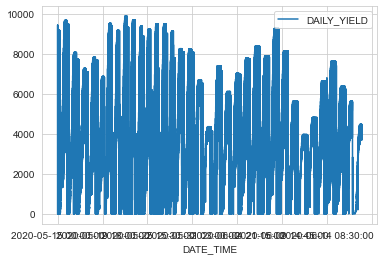

In [22]:
#parse dates ready for processing 
fig = plt.figure()

dataGen2 = pd.read_csv("C:/Users/Atrey/Documents/Plant_2_Generation_Data.csv")

dataGen2YieldDate = pd.concat([dataGen2['DAILY_YIELD'],dataGen2['DATE_TIME']],axis=1)
dataGen2YieldDate = pd.DataFrame(dataGen2YieldDate)

print(dataGen2YieldDate.plot(x='DATE_TIME',y='DAILY_YIELD'))

fig.set_size_inches(12,8)

In [45]:
dataGen2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


Text(0.5, 0, 'DATE')

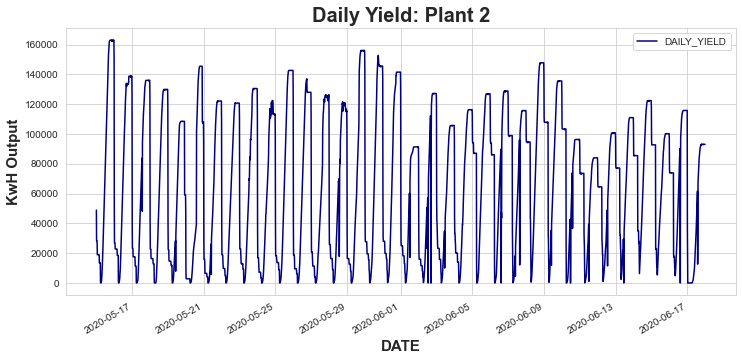

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

dataGen2['DATE_TIME'] = pd.to_datetime(dataGen2['DATE_TIME'],format='%Y-%m-%d')
dataGen2Simplified = dataGen2.groupby('DATE_TIME').sum().reset_index()

dataGen2Simplified['time'] = dataGen2Simplified['DATE_TIME'].dt.time

a = dataGen2Simplified.plot(x ='DATE_TIME',y = 'DAILY_YIELD', color='navy', ax = ax1)
fig.set_size_inches(12,12)
a.set_title('Daily Yield: Plant 2', fontsize = 20, fontweight = 'bold')
a.set_ylabel('KwH Output', fontsize = 15, fontweight = 'bold')
a.set_xlabel('DATE', fontsize = 15, fontweight = 'bold')

In [47]:
dataACDCGen2 = pd.concat([dataGen2['AC_POWER'], dataGen2['DC_POWER']], axis = 1)
dataACDCGen2 = pd.DataFrame(dataACDCGen2)
dataACDCGen2


,AC_POWER,DC_POWER
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
67693,0.0,0.0
67694,0.0,0.0
67695,0.0,0.0
67696,0.0,0.0


C:\Users\Atrey\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


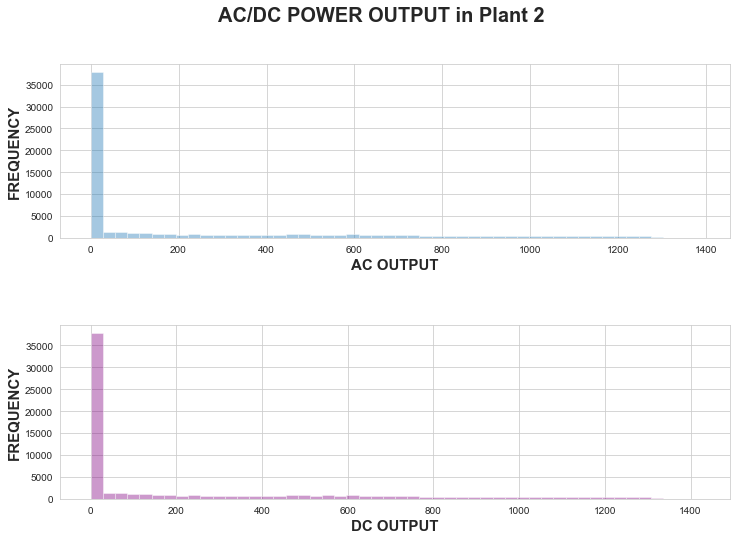

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
x_axis1 = "AC OUTPUT"
y_axis1 = "FREQUENCY"
x_axis2 = "DC OUTPUT"
y_axis2 = "FREQUENCY"
#The custom labels are set to the x and y axes

fig.suptitle("AC/DC POWER OUTPUT in Plant 2 \n", fontsize = 20, fontweight = 'bold')
graph1 = sns.distplot(dataGen2['AC_POWER'], ax = ax1, kde = False)
graph1.set(xlabel = x_axis1, ylabel=y_axis1)
graph1.set_xlabel(x_axis1, fontsize = 15, fontweight = 'bold')
graph1.set_ylabel(y_axis1, fontsize = 15, fontweight = 'bold')

graph2 = sns.distplot(dataGen2['DC_POWER'], color = 'purple', ax = ax2, kde = False)
graph2.set(xlabel = x_axis2, ylabel=y_axis2)
graph2.set_xlabel(x_axis2, fontsize = 15, fontweight = 'bold')
graph2.set_ylabel(y_axis2, fontsize = 15, fontweight = 'bold')

plt.subplots_adjust(hspace=0.5)
fig.set_size_inches(12, 8)

In [50]:
dataGen2MaximumDailyYield = pd.DataFrame(dataGen2.loc[dataGen2['DAILY_YIELD'] == 9873])
print('Maximum daily Yield In particular day is: \n')
dataGen2MaximumDailyYield

Maximum daily Yield In particular day is: 



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
15024,2020-05-22 18:30:00,4136001,Qf4GUc1pJu5T6c6,0.546667,0.526667,9873.0,838481253.0
15042,2020-05-22 18:45:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15060,2020-05-22 19:00:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15078,2020-05-22 19:15:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15096,2020-05-22 19:30:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15114,2020-05-22 19:45:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15132,2020-05-22 20:00:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15150,2020-05-22 20:15:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15168,2020-05-22 20:30:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0
15186,2020-05-22 20:45:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0


In [51]:
dataGen2MaxTotalYield = pd.DataFrame(dataGen2.loc[dataGen2['TOTAL_YIELD'] == 2247916295.0])
print('Maximum total Yield In particular day is: \n')
dataGen2MaxTotalYield


Maximum total Yield In particular day is: 



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67260,2020-06-17 19:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67282,2020-06-17 19:15:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67304,2020-06-17 19:30:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67326,2020-06-17 19:45:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67348,2020-06-17 20:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67370,2020-06-17 20:15:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67392,2020-06-17 20:30:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67414,2020-06-17 20:45:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67436,2020-06-17 21:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09
67458,2020-06-17 21:15:00,4136001,9kRcWv60rDACzjR,0.0,0.0,4197.0,2.247916e+09


### Compare yields of Plant 1 and 2 Generation Data

AxesSubplot(0.125,0.2;0.775x0.309091)


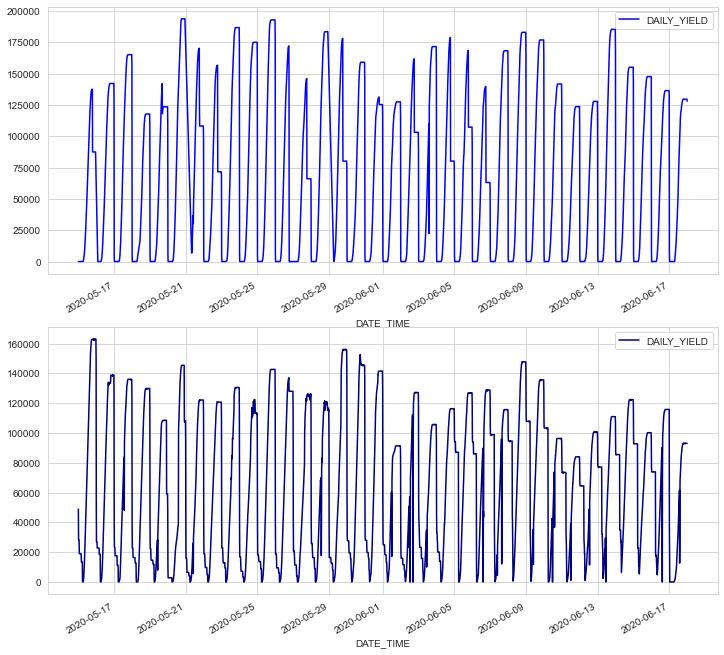

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
dataGen1['DATE_TIME'] = pd.to_datetime(dataGen1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
dataGen1Simplified = dataGen1.groupby('DATE_TIME').sum().reset_index()
dataGen1Simplified['time']=dataGen1Simplified['DATE_TIME'].dt.time
dataGen1Simplified.plot(x='DATE_TIME', y='DAILY_YIELD', color='blue', ax = ax1)
fig.set_size_inches(12,12)

dataGen2['DATE_TIME'] = pd.to_datetime(dataGen2['DATE_TIME'],format='%Y-%m-%d')
dataGen2Simplified = dataGen2.groupby('DATE_TIME').sum().reset_index()
dataGen2Simplified['time'] = dataGen2Simplified['DATE_TIME'].dt.time

print(dataGen2Simplified.plot(x ='DATE_TIME',y = 'DAILY_YIELD', color='navy', ax = ax2))
fig.set_size_inches(12,12)

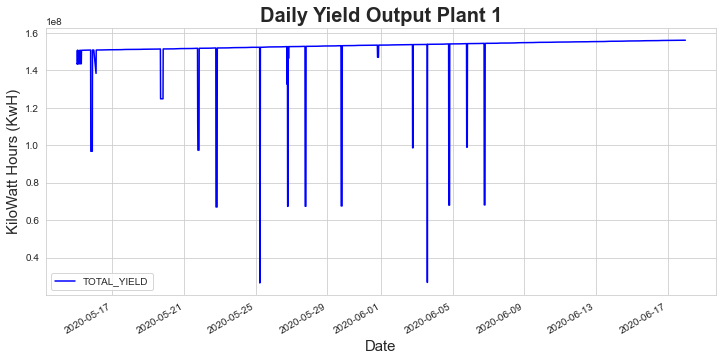

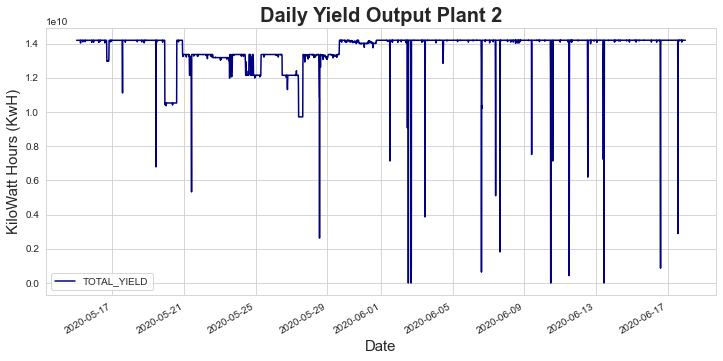

In [65]:
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(211)
ax2 = fig2.add_subplot(212)

dataGen1['DATE_TIME'] = pd.to_datetime(dataGen1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
dataGen1Simplified = dataGen1.groupby('DATE_TIME').sum().reset_index()
dataGen1Simplified['time']=dataGen1Simplified['DATE_TIME'].dt.time

a = dataGen1Simplified.plot(x='DATE_TIME', y='TOTAL_YIELD', color='blue', ax = ax1)
a.set_ylabel('KiloWatt Hours (KwH)', fontsize = 15)
a.set_xlabel('Date', fontsize = 15)
a.set_title('Daily Yield Output Plant 1', fontsize = 20, fontweight = 'bold')
fig1.set_size_inches(12,12)

dataGen2['DATE_TIME'] = pd.to_datetime(dataGen2['DATE_TIME'],format='%Y-%m-%d')
dataGen2Simplified = dataGen2.groupby('DATE_TIME').sum().reset_index()
dataGen2Simplified['time'] = dataGen2Simplified['DATE_TIME'].dt.time

b = dataGen2Simplified.plot(x ='DATE_TIME',y = 'TOTAL_YIELD', color='navy', ax = ax2)
b.set_ylabel('KiloWatt Hours (KwH)', fontsize = 15)
b.set_xlabel('Date', fontsize = 15)
b.set_title('Daily Yield Output Plant 2', fontsize = 20, fontweight = 'bold')
fig2.set_size_inches(12,12)

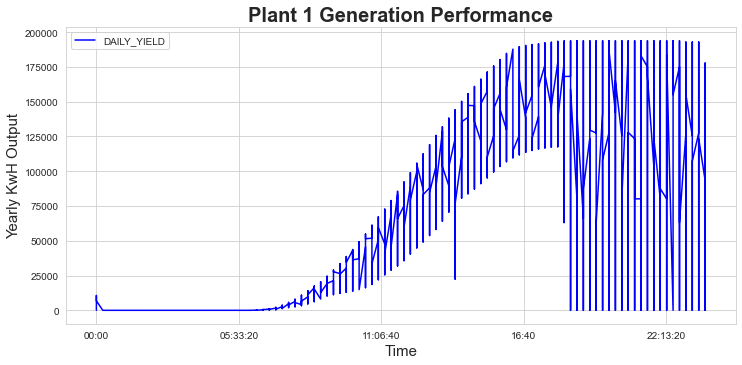

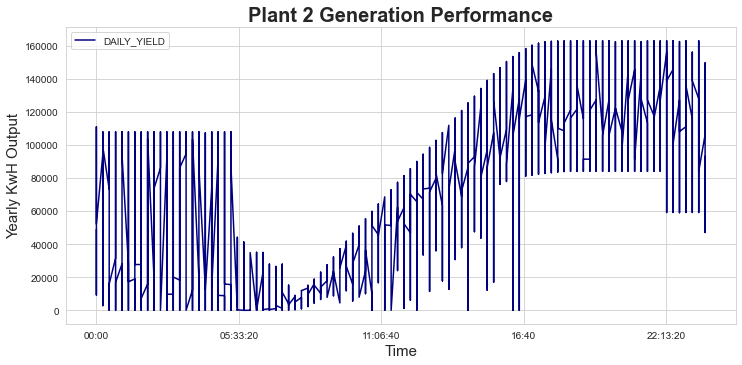

In [66]:
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(211)
ax2 = fig2.add_subplot(212)

dataGen1['DATE_TIME'] = pd.to_datetime(dataGen1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
dataGen1Simplified = dataGen1.groupby('DATE_TIME').sum().reset_index()
dataGen1Simplified['time']=dataGen1Simplified['DATE_TIME'].dt.time

a = dataGen1Simplified.plot(x='time', y='DAILY_YIELD', color='blue', ax = ax1)
fig1.set_size_inches(12,12)
a.set_title('Plant 1 Generation Performance', fontsize = 20, fontweight = 'bold')
a.set_ylabel('Yearly KwH Output', fontsize = 15)
a.set_xlabel('Time', fontsize = 15)

dataGen2['DATE_TIME'] = pd.to_datetime(dataGen2['DATE_TIME'],format='%Y-%m-%d')
dataGen2Simplified = dataGen2.groupby('DATE_TIME').sum().reset_index()
dataGen2Simplified['time'] = dataGen2Simplified['DATE_TIME'].dt.time

b = dataGen2Simplified.plot(x ='time',y = 'DAILY_YIELD', color='navy', ax = ax2)
b.set_title('Plant 2 Generation Performance', fontsize = 20, fontweight = 'bold')
b.set_ylabel('Yearly KwH Output', fontsize = 15)
b.set_xlabel('Time', fontsize = 15)
fig2.set_size_inches(12,12)

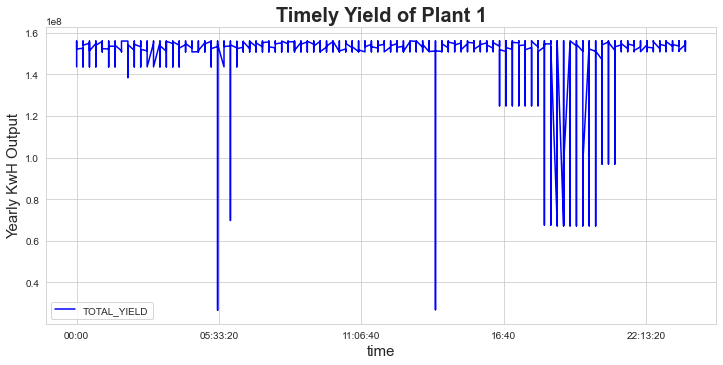

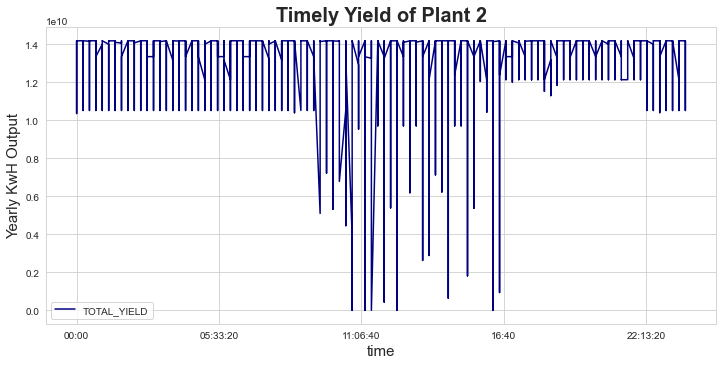

In [67]:
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(211)
ax2 = fig2.add_subplot(212)

dataGen1['DATE_TIME'] = pd.to_datetime(dataGen1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
dataGen1Simplified = dataGen1.groupby('DATE_TIME').sum().reset_index()

ax1.set_ylabel('Yearly KwH Output', fontsize = 15)
ax2.set_ylabel('Yearly KwH Output', fontsize = 15)
ax1.set_xlabel('Time', fontsize = 15)
ax2.set_xlabel('Time', fontsize = 15)

dataGen1Simplified['time']=dataGen1Simplified['DATE_TIME'].dt.time
a = dataGen1Simplified.plot(x='time', y='TOTAL_YIELD', color='blue', ax = ax1)
fig1.subplots_adjust(hspace = 0.2)
fig1.set_size_inches(12,12)
a.set_title('Timely Yield of Plant 1', fontsize = 20, fontweight = 'bold')

dataGen2['DATE_TIME'] = pd.to_datetime(dataGen2['DATE_TIME'],format='%Y-%m-%d')
dataGen2Simplified = dataGen2.groupby('DATE_TIME').sum().reset_index()
dataGen2Simplified['time'] = dataGen2Simplified['DATE_TIME'].dt.time

b = dataGen2Simplified.plot(x ='time',y = 'TOTAL_YIELD', color='navy', ax = ax2)
b.set_title('Timely Yield of Plant 2', fontsize = 20, fontweight = 'bold')
fig2.subplots_adjust(hspace = 0.2)
fig2.set_size_inches(12,12)


### Check for null values

In [35]:
a = pd.DataFrame()
a['No. of Null Values'] = dataGen2.isnull().sum()
a

,No. of Null Values
DATE_TIME,0
PLANT_ID,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0


### Check correlations

In [18]:
#Check any correlation between variables 
print(dataProcessed.corr())

#As seen below, AC and DC have an R-Squared Value of 99.9996% indicating that 
#AC and DC are correlated (share a relationship)

             PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
PLANT_ID          NaN       NaN       NaN          NaN          NaN
DC_POWER          NaN  1.000000  0.999996     0.082284     0.003815
AC_POWER          NaN  0.999996  1.000000     0.082234     0.003804
DAILY_YIELD       NaN  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD       NaN  0.003815  0.003804     0.009867     1.000000


Text(0, 0.5, 'AC Output')

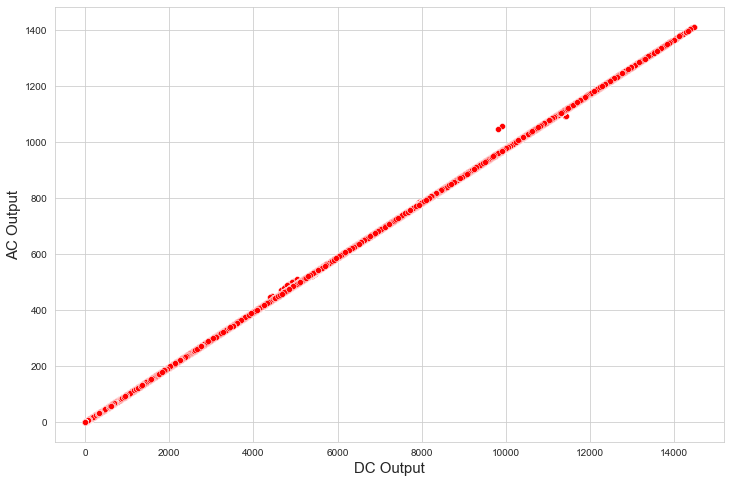

In [78]:
#USING SEABORN
fig = plt.figure()
#Create and concatenate DC and AC power in one table for visualization
dataACDC = pd.concat([dataGen1['DC_POWER'], dataGen1['AC_POWER']], axis = 1) #must include axis to specify which is x or y variable
a = sns.scatterplot(x='DC_POWER', y='AC_POWER', color = 'red', data=dataACDC) #using seaborn 
#must use data to specify where data is coming from x and y 
fig.set_size_inches(12,8)
a.set_xlabel('DC Output', fontsize = 15)
a.set_ylabel('AC Output', fontsize = 15)

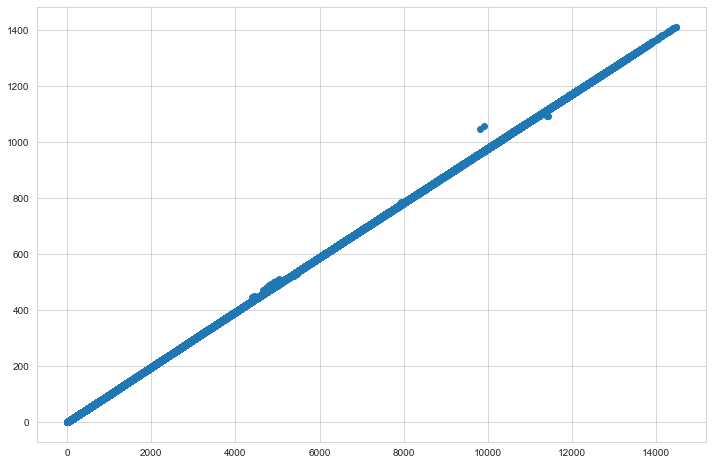

In [20]:
#USING MATPLOTLIB
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(dataACDC['DC_POWER'], dataACDC['AC_POWER']) #using matplotlib

<AxesSubplot:xlabel='AC_POWER'>

<Figure size 864x576 with 0 Axes>

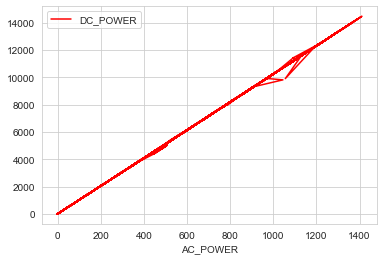

In [21]:
#No idea why this is working for this syntax???
fig = plt.figure()
fig.set_size_inches(12,8)
dataACDC.plot(x='AC_POWER', y='DC_POWER', color = 'red') 